# Assignment - Introduction to Python

1. Simulate bacterial population size data that follows an exponential growth over. The initial population is 100 and growth rate is 0.4. Simulate population size data points that have supposedly gathered over the coarse of 10 seconds in 0.2 second increments. Add noise to create realistic data. mean = 0 and std = 250 should be good. 
 - the output is an array of data points for the bacterial population size
 
2. Use the population size data you created above and assume you don't know the rate of the population growth. Estimate the rate by trying a range of parameter values and choose the one with the best fit to the data. The fit is measured by sum squared error, the least sum squared error is the best fit. (This is essentialy a brute force least square method). note: you can choose the range of paramter values to be between 0.1 to 1 incremented by 0.1.
 - the output is printing what is the estimated bacterial population growth rate is
 
**Submit a jupyter notebook with your code for each assignment. Your code should be fully commented meaning that every section and line should be preceded by a comment that describes what the next line performs**

In [1]:
import numpy as np

In [42]:
# 1 
# define parameters
rate = 0.4
N0 = 100

# generate the time data
t = np.arange(0,10.2,0.2)
population_size = N0*np.exp(rate*t) + np.random.normal(0,250,len(t))
population_size[0] = 100
population_size

array([ 100.        ,  172.9948027 ,  264.94636729,  330.66801562,
        493.05864418,   81.37594515,  239.33556252,   45.909806  ,
         22.56636645, -480.8564413 , -133.65614477,  515.8402772 ,
        500.22661677,   91.03095743,  270.64719007,   98.09930873,
        294.51145524,  360.62887858,  -44.05178129,   19.42018337,
        194.17280116,  639.93233696,  378.31654781,  669.87607683,
        386.10532315,  609.93648473, 1101.72852209,  733.29297239,
        981.3498382 ,  815.04854048,  615.08605782, 1711.49469272,
       1459.24535048, 1285.29602979, 1618.51159022, 1534.1754467 ,
       1871.84582604, 1670.79711023, 2042.43541182, 2604.1686165 ,
       2386.52949103, 2512.86345157, 2893.74251236, 3262.64485237,
       3215.14253751, 3357.90127288, 3533.79959853, 4128.63116004,
       4653.24983857, 5403.9942625 , 5563.47300656])

In [67]:
# 2
# define the range of parameters to try
range_rate = np.arange(0.1, 1, 0.1)

# define a function that calcualates mean squared error
def squared_error(prediction,data):
    residual = prediction - data
    mse = (residual**2).mean()          #or np.sum(residual**2)
    return mse

# try the parameters and choose the one with the least squared error
mse = []
for r in range_rate:
    prediction = N0*np.exp(r*t)
    mse.append(squared_error(prediction,population_size))

best_fit = range_rate[np.argmin(mse)]
print('We predict the rate of growth of this bacterial population to be',best_fit)
    

We predict the rate of growth of this bacterial population to be 0.4


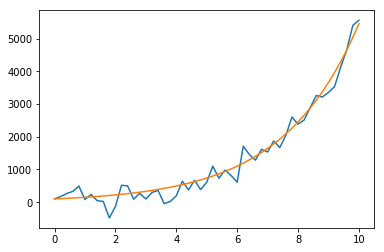

In [69]:
# Only for showing in the class (not required of students)
best_prediction = N0*np.exp(best_fit*t)

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(t,population_size);
plt.plot(t,best_prediction);